In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('/home/anastas/albuminSitePrediction/data/raw/albDB2.csv')

In [57]:
df.columns

Index(['No', 'Ligand Name', 'Canonical SMILES', 'InChIKey',
       'DOI or link to data source', 'Albumin source organism',
       'Albumin concentration, μM', 'Albumin modifications',
       'Ligand concentration, μM', 'pH', 'Buffer', 'Buffer concentration, M',
       'Temperature, K', 'Method', 'Method details', 'Model', 'Ka in M scale',
       'Kd in M scale', 'n', 'ΔH, kJ/mol', 'Ka2', 'Kd2', 'n2', 'ΔH2', 'Tag',
       'Ligand ChEMBL ID', 'Assay ChEMBL ID or BindingDB Ref'],
      dtype='object')

In [58]:
df = df[['Canonical SMILES', 'Albumin source organism', 'Ka in M scale', 'Kd in M scale']]

In [59]:
df.head()

,Canonical SMILES,Albumin source organism,Ka in M scale,Kd in M scale
0,CN(CC[C@@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,297.0,NaN
1,CN(CC[C@@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,NaN,0.000029
2,O=Cc1c(O)c(O)c(c2c1c(O)c(c(c2)C)c1c(C)cc2c(c1O...,Homo sapiens,239100.0,NaN
3,CN(CC[C@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,431.0,NaN
4,CN(CC[C@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,NaN,0.000021


In [60]:
df.rename(columns = {'Canonical SMILES':'smiles', 'Albumin source organism': 'organism',
                  'Ka in M scale': 'Ka', 'Kd in M scale' : 'Kd'}, inplace = True) 

In [61]:
df.head()

,smiles,organism,Ka,Kd
0,CN(CC[C@@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,297.0,NaN
1,CN(CC[C@@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,NaN,0.000029
2,O=Cc1c(O)c(O)c(c2c1c(O)c(c(c2)C)c1c(C)cc2c(c1O...,Homo sapiens,239100.0,NaN
3,CN(CC[C@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,431.0,NaN
4,CN(CC[C@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,NaN,0.000021


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   smiles    1750 non-null   object 
 1   organism  1757 non-null   object 
 2   Ka        1600 non-null   float64
 3   Kd        188 non-null    float64
dtypes: float64(2), object(2)
memory usage: 55.0+ KB


In [91]:
filter_ka_nan = df['Ka'].isna()
filter_kd_nan = df['Kd'].notna()

for index, row in df.iterrows():
    if np.isnan(row['Ka']) and not np.isnan(row['Kd']):
        df.loc[index, 'Ka'] = 1 / row['Kd']

In [92]:
df

,smiles,organism,Ka,Kd
0,CN(CC[C@@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,297.000000,NaN
1,CN(CC[C@@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,34013.605442,0.000029
2,O=Cc1c(O)c(O)c(c2c1c(O)c(c(c2)C)c1c(C)cc2c(c1O...,Homo sapiens,239100.000000,NaN
3,CN(CC[C@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,431.000000,NaN
4,CN(CC[C@H](c1ccccn1)c1ccc(cc1)Cl)C,Homo sapiens,46948.356808,0.000021
...,...,...,...,...
1752,CC(=O)OCC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)/C(=N\...,Bos taurus,45000.000000,0.000022
1753,OC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,Bos taurus,NaN,NaN
1754,CC(=O)OCC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)/C(=N\...,Bos taurus,NaN,NaN
1755,OC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,Bos taurus,880000.000000,NaN


In [97]:
df_median_ka = df.groupby(['smiles', 'organism'])['Ka'].agg(ka_median = 'median').reset_index()

In [98]:
df_median_ka

,smiles,organism,ka_median
0,C/C(=C\C=C\C(=C\C(=O)O)\C)/C=C/C1=C(C)CCCC1(C)C,Bos taurus,2.300000e+06
1,C1CCC(CC1)Nc1nc(Nc2ccc(cc2)c2nc3c([nH]2)cccc3)...,Bos taurus,1.300000e+05
2,C1CCN(CC1)c1nc(Nc2ccc(cc2)c2nc3c([nH]2)cccc3)n...,Bos taurus,7.700000e+04
3,C=CCNC(=S)N/N=C\c1ccnc2c1cccc2,Bos taurus,1.239500e+05
4,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@H](c1ccnc2c1cc(...,Bos taurus,6.050000e+03
...,...,...,...
378,[O-]C(=O)[C@H](Cc1ccccc1)/N=C/c1c(O)c(O)c(c2c1...,Homo sapiens,1.284000e+05
379,[O-]C(=O)[C@H](NC(=O)[C@@]12CC[C@H]([C@@H]2[C@...,Homo sapiens,5.263158e+04
380,[O-]C(=O)[C@H](NC(=O)[C@@]12CC[C@H]([C@@H]2[C@...,Homo sapiens,2.415181e+04
381,[O-]C(=O)[C@H](c1ccccc1)N/C=C/1\C(=O)C(=C(c2c1...,Homo sapiens,1.401000e+04


In [103]:
df_smiles = pd.read_csv('../data/predicted_test/custom_db_predicted.csv')

In [104]:
df_smiles

,smiles,predicted
0,CC(=O)C[C@H](c1c(=O)oc2c(c1O)cccc2)c1ccccc1,1
1,CCN(Cc1cc(ccc1O)Nc1ccnc2c1ccc(c2)Cl)CC.Cl,1
2,CCN1CCN(C(=O)C1=O)C(=O)N[C@@H](C(=O)N[C@@H]1C(...,1
3,OC(=O)c1ccccc1Nc1cccc(c1)C(F)(F)F,1
4,CCCCC/C=C\C[C@H](/C=C/C=C/C=C\[C@H](CCCC(=O)O)O)O,1
...,...,...
278,CCCC(=O)c1ccc2c(c1)N(CCCN1CCN(CC1)C)c1c(S2)cccc1,1
279,CCCCNc1ncnc2c1ncn2[C@@H]1O[C@@H]([C@H]([C@H]1O...,1
280,O1CCN(CC1)CCNc1ccnc2c1ccc1c2ccc2c1nccc2NCCN1CC...,1
281,Clc1cc(Cl)cc(c1)c1nc2c(o1)cc(cc2)C(=O)O,1


In [106]:
df_merged = pd.merge(df_median_ka, df_smiles, how = 'inner', on = 'smiles')

In [112]:
df_merged.sample()

,smiles,organism,ka_median,predicted
301,OCC[C@H]1OC[C@@]1(OC(=O)C)C1C(=C(O)C(=O)C2=C([...,Homo sapiens,3134.796238,1


In [111]:
df_taurus = df_merged.loc[df_merged['organism'] == 'Bos taurus']

,smiles,organism,ka_median,predicted
0,C/C(=C\C=C\C(=C\C(=O)O)\C)/C=C/C1=C(C)CCCC1(C)C,Bos taurus,2300000.0,1
1,C1CCC(CC1)Nc1nc(Nc2ccc(cc2)c2nc3c([nH]2)cccc3)...,Bos taurus,130000.0,1
2,C1CCN(CC1)c1nc(Nc2ccc(cc2)c2nc3c([nH]2)cccc3)n...,Bos taurus,77000.0,1
3,C=CCNC(=S)N/N=C\c1ccnc2c1cccc2,Bos taurus,123950.0,1
4,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@H](c1ccnc2c1cc(...,Bos taurus,6050.0,1
...,...,...,...,...
332,S=C(Nc1ccc(cc1)[N+](=O)[O-])N/N=C\c1ccnc2c1cccc2,Bos taurus,70600.0,1
333,S=C(Nc1cccc2c1cccc2)N/N=C\c1ccnc2c1cccc2,Bos taurus,88300.0,1
334,S=C(Nc1ccccc1)N/N=C\c1ccnc2c1cccc2,Bos taurus,92400.0,1
335,S=C(Nc1cccnc1)N/N=C\c1ccnc2c1cccc2,Bos taurus,60100.0,1


In [113]:
df_homo = df_merged.loc[df_merged['organism'] == 'Homo sapiens']

In [114]:
df_homo

,smiles,organism,ka_median,predicted
5,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@H](c1ccnc2c1cc(...,Homo sapiens,7700.000000,1
7,C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@@H](c1ccnc2c1cc(...,Homo sapiens,1818.122977,1
8,CC(=C)[C@@H]1CC[C@]2([C@H]1[C@H]1CC[C@H]3[C@@]...,Homo sapiens,222222.222222,1
9,CC(=C)[C@@H]1CC[C@]2([C@H]1[C@H]1CC[C@H]3[C@@]...,Homo sapiens,575657.894737,1
10,CC(=C)[C@@H]1CC[C@]2([C@H]1[C@H]1CC[C@H]3[C@@]...,Homo sapiens,253205.128205,1
...,...,...,...,...
340,[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1COC(=O)C(=O)O...,Homo sapiens,6201.300000,0
341,[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1COC(=O)c1ccnc...,Homo sapiens,1709.800000,1
342,[O-]C(=O)C(F)(F)F.[O-]C(=O)C(F)(F)F.[O-]C(=O)C...,Homo sapiens,37735.849057,1
343,[O-]C(=O)[C@H](NC(=O)[C@@]12CC[C@H]([C@@H]2[C@...,Homo sapiens,52631.578947,1


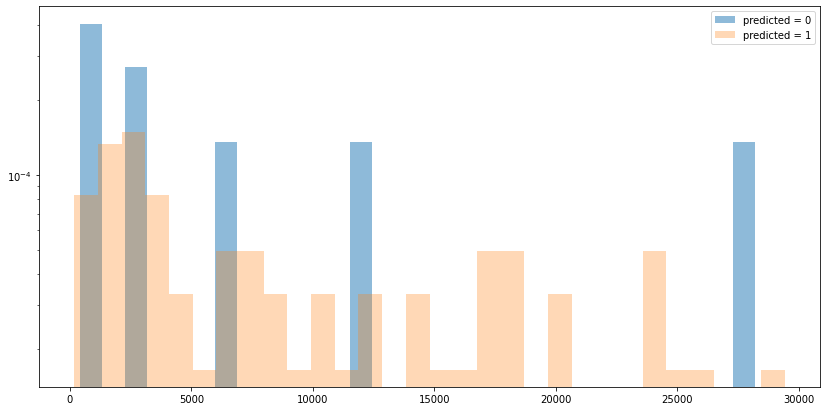

In [139]:
plt.figure(figsize=(14, 7))
plt.hist(df_homo.loc[df_homo['predicted'] == 0]['ka_median'], bins=30, 
         alpha=0.5, label = 'predicted = 0', density=True, log = True)
plt.hist(df_homo.loc[df_homo['predicted'] == 1 & (df_homo['ka_median'] < 30000)]['ka_median'], bins=30, 
         alpha=0.3, label = 'predicted = 1', density=True, log = True)
plt.legend()
plt.show()